In [1]:
def get_soc_no_wf(p_dodge, p_soc):
    return (1-p_dodge)**2 * p_soc

In [2]:
get_soc_no_wf(0.03, 0.42)

0.395178

In [41]:
def get_soc_with_wf(p_dodge, ws):
#     print(p_soc)
    p_soc = ws*7/60
    res = (1-p_dodge)**2 * (1 + 0.2 * (1 - p_dodge) * (1 - p_soc)) * p_soc
    print('-'*50)
    print(f'For weapon speed = {ws}:')
    print(f'Chance to proc without wf : {p_soc}')
    print(f'Chance to proc with wf    : {res}')
    print(f'Increase with windfury    : {res - p_soc}')

In [42]:
get_soc_with_wf(0.0, 3.5)
get_soc_with_wf(0.0, 3.6)
get_soc_with_wf(0.0, 3.7)
get_soc_with_wf(0.0, 3.8)

--------------------------------------------------
For weapon speed = 3.5:
Chance to proc without wf : 0.4083333333333333
Chance to proc with wf    : 0.4566527777777778
Increase with windfury    : 0.04831944444444447
--------------------------------------------------
For weapon speed = 3.6:
Chance to proc without wf : 0.42
Chance to proc with wf    : 0.46872
Increase with windfury    : 0.04872000000000004
--------------------------------------------------
For weapon speed = 3.7:
Chance to proc without wf : 0.4316666666666667
Chance to proc with wf    : 0.4807327777777778
Increase with windfury    : 0.04906611111111109
--------------------------------------------------
For weapon speed = 3.8:
Chance to proc without wf : 0.4433333333333333
Chance to proc with wf    : 0.4926911111111111
Increase with windfury    : 0.04935777777777778


In [5]:
def get_soc_wf_ratio(p_dodge, p_soc):
    print(f'For dodge chance = {p_dodge} and SoC proc chance of {p_soc}:')
    p_soc_base = get_soc_no_wf(p_dodge, p_soc)
    p_soc_wf = get_soc_with_wf(p_dodge, p_soc)
    print(f'prob without wf : {p_soc_base}')
    print(f'prob with wf    : {p_soc_wf}')
    ratio = p_soc_wf / p_soc_base
    print(f'ratio           : {ratio}')
    return(p_soc_base, p_soc_wf, ratio)

In [6]:
get_soc_wf_ratio(0, 0.42)

For dodge chance = 0 and SoC proc chance of 0.42:
prob without wf : 0.42
prob with wf    : 0.46872
ratio           : 1.116


(0.42, 0.46872, 1.116)

In [7]:
get_soc_wf_ratio(0.02, 0.42)

For dodge chance = 0.02 and SoC proc chance of 0.42:
prob without wf : 0.40336799999999995
prob with wf    : 0.44922287423999996
ratio           : 1.11368


(0.40336799999999995, 0.44922287423999996, 1.11368)

In [8]:
get_soc_wf_ratio(0.065, 0.42)

For dodge chance = 0.065 and SoC proc chance of 0.42:
prob without wf : 0.36717450000000007
prob with wf    : 0.40699824627000003
ratio           : 1.1084599999999998


(0.36717450000000007, 0.40699824627000003, 1.1084599999999998)

In [9]:
get_soc_wf_ratio(0, 0.42)

For dodge chance = 0 and SoC proc chance of 0.42:
prob without wf : 0.42
prob with wf    : 0.46872
ratio           : 1.116


(0.42, 0.46872, 1.116)

In [10]:
proc_torch = 7*3.8/60
proc_torch

proc_cata = 7*3.5/60
get_soc_wf_ratio(0, proc_cata)

0.4433333333333333

For dodge chance = 0 and SoC proc chance of 0.4083333333333333:
prob without wf : 0.4083333333333333
prob with wf    : 0.4566527777777778
ratio           : 1.1183333333333334


(0.4083333333333333, 0.4566527777777778, 1.1183333333333334)

In [11]:
get_soc_wf_ratio(0, proc_torch)

For dodge chance = 0 and SoC proc chance of 0.4433333333333333:
prob without wf : 0.4433333333333333
prob with wf    : 0.4926911111111111
ratio           : 1.1113333333333333


(0.4433333333333333, 0.4926911111111111, 1.1113333333333333)

In [12]:
0.4926911111 * 0.7

0.34488377777

In [13]:
0.42 / 0.34488377777

1.2178015524989243

In [14]:
1.2178015524989243 / 1.28

0.9514074628897846

In [15]:
get_soc_wf_ratio(0, 0.8)

For dodge chance = 0 and SoC proc chance of 0.8:
prob without wf : 0.8
prob with wf    : 0.8320000000000001
ratio           : 1.04


(0.8, 0.8320000000000001, 1.04)

In [16]:
get_soc_wf_ratio(0, 0.2)

For dodge chance = 0 and SoC proc chance of 0.2:
prob without wf : 0.2
prob with wf    : 0.23200000000000004
ratio           : 1.1600000000000001


(0.2, 0.23200000000000004, 1.1600000000000001)

For dodge chance = 0.01 and SoC proc chance of 0.0011666666666666668:
prob without wf : 0.00114345
prob with wf    : 0.0013695889630500001
ratio           : 1.197769
For dodge chance = 0.01 and SoC proc chance of 0.011254208754208754:
prob without wf : 0.01103025
prob with wf    : 0.01318966042625
ratio           : 1.1957716666666667
For dodge chance = 0.01 and SoC proc chance of 0.021341750841750842:
prob without wf : 0.02091705
prob with wf    : 0.02497023741905
ratio           : 1.1937743333333333
For dodge chance = 0.01 and SoC proc chance of 0.03142929292929293:
prob without wf : 0.03080385
prob with wf    : 0.03671131994145
ratio           : 1.191777
For dodge chance = 0.01 and SoC proc chance of 0.041516835016835014:
prob without wf : 0.040690649999999995
prob with wf    : 0.048412907993449994
ratio           : 1.1897796666666667
For dodge chance = 0.01 and SoC proc chance of 0.05160437710437711:
prob without wf : 0.05057745
prob with wf    : 0.06007500157505
ratio           : 1

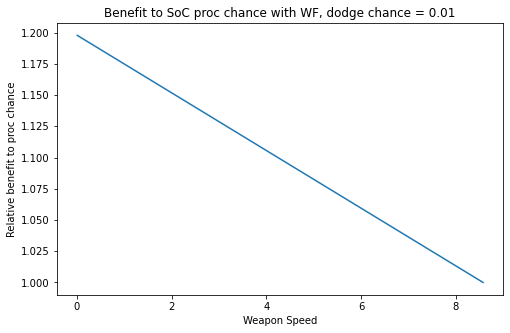

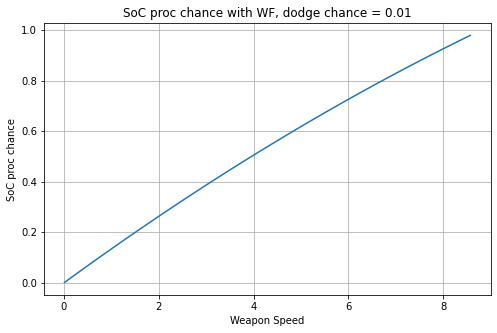

In [17]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def generate_graph(p_dodge, divisions):  
    speeds = np.linspace(0.01, 8.57, num=divisions)
    speeds
    results = []
    for speed in speeds:
        proc_soc = 7*speed/60
        r = get_soc_wf_ratio(p_dodge, proc_soc)
        results.append(r)
    ratios = [r[2] for r in results]
    procs = [r[1] for r in results]
    print(ratios)
    

    figure = Figure()
    canvas = FigureCanvas(figure)
    fig = plt.figure(figsize = (8, 5))
    # Create the plot
    plt.plot(speeds, ratios)
    plt.title(f'Benefit to SoC proc chance with WF, dodge chance = {p_dodge}')
    plt.ylabel('Relative benefit to proc chance')
    plt.xlabel('Weapon Speed')
    
    figure = Figure()
    canvas = FigureCanvas(figure)
    fig = plt.figure(figsize = (8, 5))
    # Create the plot
    plt.plot(speeds, procs)
    plt.grid()
    plt.title(f'SoC proc chance with WF, dodge chance = {p_dodge}')
    plt.ylabel('SoC proc chance')
    plt.xlabel('Weapon Speed')
    
generate_graph(0.01, 100)

In [18]:
jotc_sp = 219
soc_spc = 0.2

f_holy = 1.1 * 0.94

p_glance = 0.24
f_glance = 0.75
f_crit = 2.06

p_wf = 0.2

weapon_dict = {
    'LHE': {'speed': 3.6, 'lower': 365.0, 'upper': 549.0},
    'torch': {'speed': 3.8, 'lower': 396, 'upper': 595}
}

def get_d(ap, weapon_label):
    if weapon_label not in weapon_dict:
        print(f'ERROR: label {weapon_label} not valid!')
    w_d = weapon_dict[weapon_label]
    median = (w_d['upper'] + w_d['lower']) / 2.
    return (median + ( ap * w_d['speed'] ) / 14) * 1.06 * 1.03 * 1.02

def get_phys_damage_outcomes_factor(p_crit, p_dodge):
    return ( (p_glance * f_glance) + (p_crit * f_crit ) + (1 - p_glance - p_crit - p_dodge) ) / (1 - p_dodge)

def get_special_damage_outcomes_factor(p_crit):
    return (p_crit * f_crit + (1 - p_crit))

def get_f_phys(target_armor, arm_pen=0):
    return 1 - ( ((target_armor - arm_pen + 1) ) / (467.5*73 - 22167.5) )

def get_f_wf(ap, bonus_ap=511.75, weapon_label='LHE'):
    if weapon_label not in weapon_dict:
        print(f'ERROR: label {weapon_label} not valid!')
    w_d = weapon_dict[weapon_label]
    d_weapon_ave = (w_d['upper'] + w_d['lower']) / 2.
#     print(d_weapon_ave)
    ws = w_d['speed']
    return (d_weapon_ave + (ws*(ap+bonus_ap ) / 14) ) / ( (d_weapon_ave + (ws*ap) / 14) )

def get_soc_dmg(p_dodge, p_crit=0.35, weapon_label='LHE', ap=3000,
                target_armor=1800, arm_pen=0, bonus_wf_ap=511.75):
    
    # Weapon stats
    if weapon_label not in weapon_dict:
        print(f'ERROR: label {weapon_label} not valid!')
    w_d = weapon_dict[weapon_label]
    
    # First get the phys D.
    d_ave_phys = get_d(ap, weapon_label) * get_f_phys(target_armor, arm_pen)
#     print(f'weapon damage phys = {d_ave_phys}') 
    phys_damage_outcomes_factor = get_phys_damage_outcomes_factor(p_crit, p_dodge)
#     print(f'damage outcomes f = {phys_damage_outcomes_factor}')
    d_ave_melee = d_ave_phys * phys_damage_outcomes_factor
#     print(d_ave_melee)
    
    # Next get the holy D on a SoC proc.
    d_ave_holy = f_holy * ( (d_ave_phys + (jotc_sp * soc_spc) ) )
    d_ave_soc_proc = get_special_damage_outcomes_factor(p_crit) * 0.7 * d_ave_holy
#     print(d_ave_soc_proc)
    
    # Get the SoC proc chance.
    p_soc = 7*w_d['speed']/60
    
    # Get the windfury attack modifier at this ap
    f_wf = get_f_wf(ap, bonus_ap=bonus_wf_ap)
    
    # Now project how many of these we get in a SoC swing under windfury
    average_d = (1-p_dodge) * d_ave_melee + (1 - p_dodge)**2 * p_wf * f_wf * d_ave_melee + \
                (1 - p_dodge)**2 * p_soc * d_ave_soc_proc + \
                (1 - p_dodge)**3 * p_wf * p_soc * d_ave_soc_proc
                
    
#     print(average_d)
    return(average_d)
    
get_soc_dmg(0.01)
get_soc_dmg(0.065)

2433.2695614768386

2269.1393062779084

In [19]:
global_scale_factor = 1.02 * 1.06 * 1.03
global_scale_factor

1.1136360000000003

In [20]:
dodge_chances = np.linspace(0.00, 0.065, num=27)
dodge_chances

expertises = np.linspace(0, 26, num=27)
expertises

array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
       0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
       0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525, 0.055 , 0.0575,
       0.06  , 0.0625, 0.065 ])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26.])

[2743.7724036052973, 2735.251311655639, 2726.744984294856, 2718.253411029175, 2709.776581364821, 2701.314484808022, 2692.8671108650015, 2684.434449041987, 2676.0164888452027, 2667.613219780876, 2659.2246313552323, 2650.8507130744974, 2642.491454444898, 2634.146844972657, 2625.816874164004, 2617.5015315251626, 2609.2008065623595, 2600.9146887818197, 2592.6431676897705, 2584.3862327924353, 2576.143873596043, 2567.916079606818, 2559.702840330986, 2551.5041452747723, 2543.3199839444046, 2535.1503458461066, 2526.9952204861056]


Text(0.5, 1.0, 'Projected SoC swing damage with windfury, LHE')

Text(0, 0.5, 'Damage')

Text(0.5, 0, 'Dodge Chance')

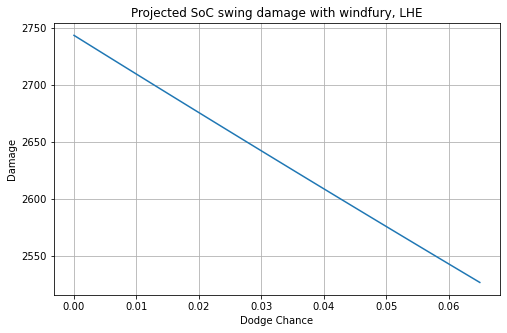

In [21]:
results_LHE = []
for p_dodge in dodge_chances:
    results_LHE.append(get_soc_dmg(p_dodge) * global_scale_factor)
print(results_LHE)

figure = Figure()
canvas = FigureCanvas(figure)
fig = plt.figure(figsize = (8, 5))
# Create the plot
plt.plot(dodge_chances, results_LHE)
plt.grid()
plt.title(f'Projected SoC swing damage with windfury, LHE')
plt.ylabel('Damage')
plt.xlabel('Dodge Chance')

[2963.5655428794607, 2954.2741782848857, 2944.999190136891, 2935.7405666517616, 2926.4982960457874, 2917.272366535253, 2908.062766336446, 2898.8694836656528, 2889.6925067391594, 2880.5318237732554, 2871.3874229842245, 2862.2592925883555, 2853.147420801934, 2844.0517958412474, 2834.9724059225828, 2825.9092392622256, 2816.8622840764647, 2807.8315285815843, 2798.8169609938745, 2789.818569529619, 2780.8363424051063, 2771.8702678366226, 2762.9203340404542, 2753.9865292328896, 2745.0688416302146, 2736.167259448715, 2727.28177090468]


Text(0.5, 1.0, 'Projected SoC swing damage with windfury, Torch')

Text(0, 0.5, 'Damage')

Text(0.5, 0, 'Expertise')

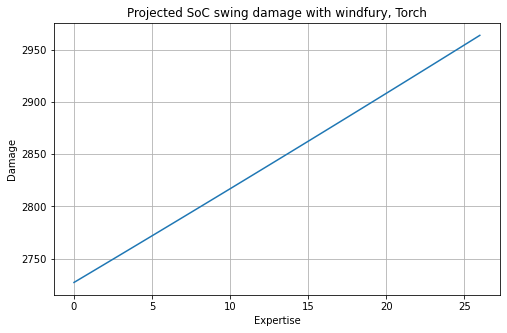

In [22]:
results_torch = []
for p_dodge in dodge_chances:
    results_torch.append(get_soc_dmg(p_dodge, weapon_label='torch') * global_scale_factor)
print(results_torch)

results_torch.reverse()
figure = Figure()
canvas = FigureCanvas(figure)
fig = plt.figure(figsize = (8, 5))
# Create the plot
plt.plot(expertises, results_torch)
plt.grid()
plt.title(f'Projected SoC swing damage with windfury, Torch')
plt.ylabel('Damage')
plt.xlabel('Expertise')

In [23]:
d1 = get_soc_dmg(0.0, weapon_label='torch')
d2 = get_soc_dmg(0.065, weapon_label='torch')

d1/d2

1.0866370957689502